<a href="https://colab.research.google.com/github/kojiyam/information-transmission-engineering/blob/main/OFDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 可聴帯域搬送波のOFDM変調信号

ガードインターバルつけていない

In [1]:
# 2022/5/13時点のGoogle Colabでは!pip show ipythonで5.5.0と出て，
# IPython.display.Audio(normalize=False)ができないので，アップデート
# 指示通り"Restart Runtime"必要
!pip install "ipython>=7"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 7.6 MB/s 


In [2]:
!pip install scikit-commpy
from commpy.filters import rrcosfilter, rcosfilter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 741 kB/s 
  Created wheel for scikit-commpy: filename=scikit_commpy-0.7.0-py3-none-any.whl size=58556 sha256=fd0b73348350bd0f35bf60e9d42982cf954a1b3910f4e566878e31ee5493e5b9
  Stored in directory: /root/.cache/pip/wheels/52/2a/a2/2daff6a2d5e3b96d70fb03e5b0699ce70c98cb4c00c8107c38
Successfully built scikit-commpy


In [3]:
import numpy as np
np.random.seed(1)

import matplotlib.pyplot as plt
#plt.style.use('dark_background') # for dark-mode
plt.rcParams["font.size"] = 16

import IPython.display

In [4]:
Ns = 2  # Number of OFDM symbols
# Ts = 16 # OFDM Symbol length (s/OFDM symbol)
Ts = 8 # OFDM Symbol length (s/OFDM symbol)
sampling_rate = 4000 # 音として出力するためのサンプリング周波数．変調とは関係なし
Nc = 16 # Number of subcarriers

In [5]:
B = np.reshape(np.random.randint(0, 4, Ns*Nc), (Ns,Nc)) # 2 bitを表す [0,3] の一様乱数N個．ビット系列 bit sequence
B[0,:]

array([1, 3, 0, 0, 3, 1, 3, 1, 3, 0, 0, 1, 0, 3, 1, 0])

In [6]:
KK = np.empty(0)
for i in range(Ns):
  AA = np.exp(1j * (1/4 + B[i,:]/2) * np.pi) # QPSKベースバンドシンボル列
  KK = np.concatenate((KK, np.fft.ifft( AA ) ))

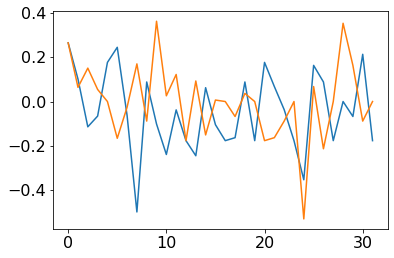

In [7]:
plt.plot(KK.real)
plt.plot(KK.imag)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


(-1.0, 16.0)

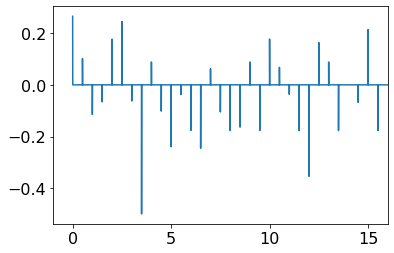

In [8]:
XX = np.ravel( np.concatenate([ np.reshape(KK, (Ns*Nc,1)),
                               np.zeros([Ns*Nc,np.int(sampling_rate*Ts/Nc)-1])], axis=1))
#tt = np.arange(np.int(sampling_rate*Ts/Nc))/sampling_rate
tt = np.arange( XX.size ) / sampling_rate
#plt.plot(XX.real)
plt.plot(tt, XX.real)
plt.xlim(-1,Nc)

Text(0, 0.5, '$ h_\\mathrm{RRC}(t)$')

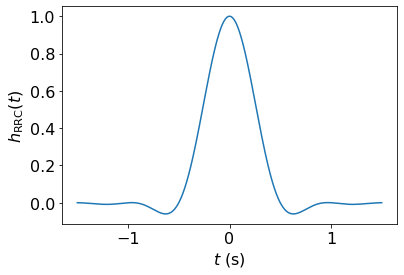

In [9]:
t0, h_RRC = rcosfilter(1*sampling_rate*3, 0.8, Ts/Nc, sampling_rate)
plt.plot(t0,h_RRC)
plt.xlabel('$t$ (s)')
plt.ylabel('$ h_\mathrm{RRC}(t)$')

In [10]:
# ベースバンド信号
x2 = np.convolve(h_RRC, XX) # Waveform with PSF
t2 = np.arange(x2.size)/sampling_rate

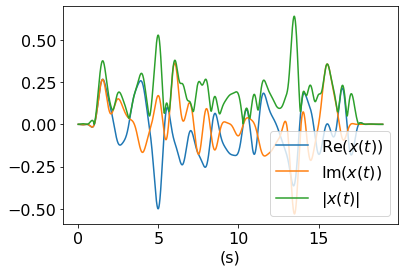

In [11]:
plt.plot(t2, x2.real, label='$\mathrm{Re}(x(t))$')
plt.plot(t2, x2.imag, label='$\mathrm{Im}(x(t))$')
plt.plot(t2, np.abs(x2), label='$|x(t)|$')
plt.xlabel('(s)')
plt.legend(loc='lower right')

In [12]:
# 搬送波のパラメータ
Ac = 0.6
fc = 523 # (Hz) Carrier frequency

In [13]:
s = np.real( Ac * np.exp( (1j) * 2 * np.pi * fc * t2) * x2 )

In [14]:
IPython.display.Audio(s, rate = sampling_rate)

(0.0, 18.0)

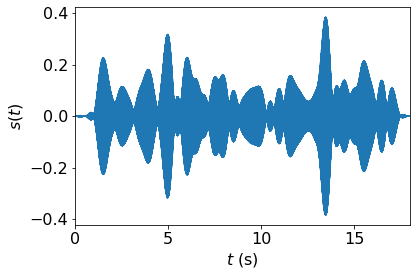

In [15]:
plt.plot(t2, s)
plt.xlabel('$t$ (s)')
plt.ylabel('$s(t)$')
plt.xlim(0,18)

In [16]:
S = np.fft.fft(s)
freq = np.fft.fftfreq(s.size, d=1/sampling_rate)
S_amp = np.abs(S/(S.size/2))

(521.0, 525.0)

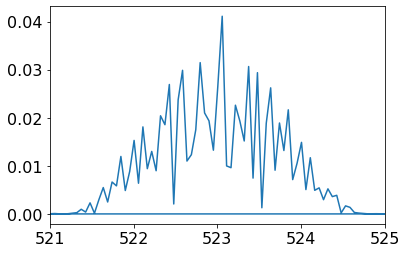

In [17]:
plt.plot(freq, S_amp)
plt.xlim(521,525)

OFDM とフィルタ

https://jp.mathworks.com/help/comm/ref/comm.ofdmmodulator-system-object.html#bt6p2uv